In [7]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import pandas as np
import matplotlib.pyplot as plt

In [14]:
def Build_graph(file):
    DG = nx.DiGraph()
    
    f = open(file)
    f.readline()
    
    for line in f.readlines():
        idx, source, destination = map(int, line.strip().split('\t'))
        
        DG.add_edge(*(source, destination))
    
    return DG   

In [15]:
DG = Build_graph('wikigraph_reduced.csv')

In [578]:
# inizializza i dizionari, ad ogni nodo associa una lista vuora
input_edges = {}
output_edges = {}
for node in DG.nodes:
    input_edges[node] = []
    output_edges[node] = []

In [579]:
# riempimento delle liste
f = open('wikigraph_reduced.csv')
f.readline()

for line in f.readlines():
    idx, source, destination = map(int, line.strip().split('\t'))

    output_edges[source].append(destination)
    input_edges[destination].append(source)
    
f.close()

In [6]:
List = []
for node in DG.nodes:
    if input_edges[node] == output_edges[node]:
        List.append(True)
    else:
        List.append(False)
List = np.array(List)    

In [7]:
List.sum()

AttributeError: 'BooleanArray' object has no attribute 'sum'

In [30]:
List.sum()/len(DG.edges)

0.03470753103950784

In [36]:
input_degree = []
output_degree = []
for k in DG.nodes:
    
    output_degree. append(len(output_edges[k]))
    input_degree.append(len(input_edges[k]))
    
    

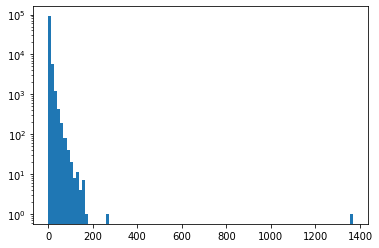

In [55]:
plt.hist(output_degree, bins= 100)
plt.yscale('log')
plt.show()

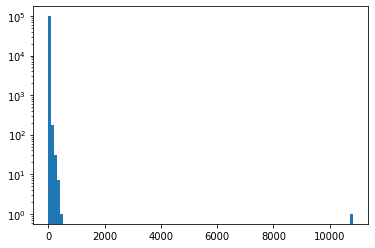

In [48]:
plt.hist(input_degree, bins= 100)
plt.yscale('log')
plt.show()

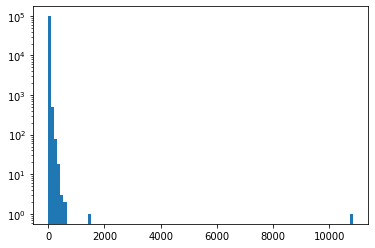

In [50]:
x = [output_degree[i] + input_degree[i] for i in range(len(output_degree))]
plt.hist(x, bins= 100)
plt.yscale('log')
plt.show()

In [60]:
v = list(output_edges.keys())[125]
c = 4
List = []
List 
for output_edges[v]

[1185516]

# RQ 2

In [63]:
queue = []

In [64]:
queue.append(3)

In [17]:
def BFS(Source, output_edges):
    distance = {}
    visited = {k: False for k in DG.nodes}
    queue = []

    queue.append(Source)
    distance[Source] = 0
    visited[Source] = True

    while queue:
        v = queue.pop()

        for node in output_edges[v]:
            if visited[node] == False:
                visited[node] = True
                distance[node] = distance[v] + 1
                queue.append(node)

    return distance

In [18]:
def Nearest_page(source, num_click, output_edges):
    distance = BFS(source,output_edges)

    return [k for k in distance.keys() if distance[k] <= num_click]

In [19]:
print(Nearest_page(1185516, 2, output_edges))

[1185516]


In [247]:
dist = BFS(134, output_edges)
dist[167]

KeyError: 167

# preprocessing

In [16]:
f = open('wiki-topcats-categories.txt', encoding='utf-8')
print(f.readline())
f.close()

Category:Buprestoidea; 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 5

In [8]:
# Append multiple value to a key in dictionary
def add_values_in_dict(sample_dict, key, list_of_values):
    """Append multiple values to a key in the given dictionary"""
    if key not in sample_dict:
        sample_dict[key] = list()
    sample_dict[key].extend(list_of_values)
    return sample_dict

In [9]:
#PagesPerCategory DataFrame

pages_per_categories = pd.read_csv('wiki-topcats-categories.txt',names=['cats'])
#pages_per_categories['cats'] = pages_per_categories["cats"].str.split(" ", expand=True)
pages_per_categories = pd.DataFrame(pages_per_categories.cats.str.split(' ', 1).tolist(), columns = ['cats','pages'])
pages_per_categories["cats"] = pages_per_categories["cats"].str.strip("-")
pages_per_categories['cats'] = pages_per_categories['cats'].str.replace("Category:", "")
pages_per_categories['cats'] = pages_per_categories['cats'].str.replace(";", "")
pages_per_categories['cats'] = pages_per_categories['cats'].str.replace("_", " ")

print(pages_per_categories)

                                                  cats  \
0                                         Buprestoidea   
1                                People from Worcester   
2      Skin conditions resulting from physical factors   
3                                     Visual kei bands   
4                           Japanese rock music groups   
...                                                ...   
17359                   British science fiction novels   
17360                           Television soundtracks   
17361                         Diptera of North America   
17362                                  Diptera of Asia   
17363                                       Tachinidae   

                                                   pages  
0      301 302 303 304 305 306 307 308 309 310 311 31...  
1      1056 1057 1058 1059 1060 60971 76515 76871 780...  
2      971 973 1166 1167 1168 1169 1170 1171 1172 117...  
3      1297 1300 1311 1312 1313 1314 1315 1316 1319 1...  
4      1

In [10]:
pages_per_categories_dict = dict(pages_per_categories.values.tolist())
pages_per_categories_dict

{'Buprestoidea': '301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 54

In [11]:
separated_pages_per_categories_dict = {}

for key in pages_per_categories_dict:
    
    if pages_per_categories_dict[key] != None:
    
        pages = pages_per_categories_dict[key].split()
        #print(articles)
        
        separated_pages_per_categories_dict = add_values_in_dict(separated_pages_per_categories_dict, key, pages)

In [68]:
separated_pages_per_categories_dict['Amines']

['944',
 '1181',
 '1208',
 '1239',
 '1571',
 '1572',
 '1622',
 '1789',
 '2127',
 '4555',
 '4608',
 '4658',
 '4771',
 '5822',
 '6044',
 '6686',
 '6698',
 '6742',
 '6998',
 '7397',
 '7469',
 '7529',
 '7537',
 '7589',
 '7630',
 '7652',
 '8040',
 '8206',
 '8377',
 '8557',
 '8558',
 '8767',
 '8773',
 '8806',
 '8807',
 '8814',
 '8821',
 '8823',
 '8826',
 '8827',
 '8832',
 '8848',
 '8850',
 '8851',
 '8864',
 '8917',
 '8923',
 '8958',
 '8960',
 '8974',
 '8983',
 '8984',
 '8987',
 '8998',
 '8999',
 '9025',
 '9118',
 '9292',
 '9471',
 '9678',
 '9680',
 '9763',
 '9778',
 '9794',
 '9887',
 '9951',
 '10200',
 '10209',
 '10466',
 '10480',
 '10795',
 '10834',
 '10882',
 '10963',
 '10999',
 '11193',
 '11197',
 '11328',
 '11415',
 '11448',
 '11470',
 '11522',
 '11535',
 '11659',
 '11723',
 '12093',
 '12203',
 '12570',
 '12623',
 '12630',
 '12705',
 '12745',
 '12878',
 '13996',
 '14082',
 '14140',
 '14312',
 '14386',
 '14391',
 '14392',
 '14393',
 '14395',
 '14396',
 '14447',
 '14448',
 '14609',
 '14789

In [181]:
inverted_dict = {}

for k in tqdm(separated_pages_per_categories_dict.keys()):
    for node in separated_pages_per_categories_dict[k]:
        if int(node) not in  inverted_dict.keys():
            inverted_dict[int(node)] = []
            inverted_dict[int(node)].append(k)
        else:
            inverted_dict[int(node)].append(k)
            
        
    

100%|██████████| 16824/16824 [00:08<00:00, 1898.57it/s]


In [182]:
count = 0
for k in inverted_dict.keys():
    if len(inverted_dict[k]) > 1:
        count += 1
print(count)     

962346


In [125]:
inverted_dict

{301: ['Buprestoidea'],
 302: ['Buprestoidea'],
 303: ['Buprestoidea', 'Insect families'],
 304: ['Buprestoidea'],
 305: ['Buprestoidea'],
 306: ['Buprestoidea'],
 307: ['Buprestoidea'],
 308: ['Buprestoidea'],
 309: ['Buprestoidea'],
 310: ['Buprestoidea'],
 311: ['Buprestoidea'],
 312: ['Buprestoidea'],
 313: ['Buprestoidea'],
 314: ['Buprestoidea'],
 315: ['Buprestoidea'],
 316: ['Buprestoidea'],
 317: ['Buprestoidea'],
 318: ['Buprestoidea'],
 319: ['Buprestoidea'],
 320: ['Buprestoidea'],
 321: ['Buprestoidea'],
 322: ['Buprestoidea'],
 323: ['Buprestoidea'],
 324: ['Buprestoidea'],
 325: ['Buprestoidea'],
 326: ['Buprestoidea'],
 327: ['Buprestoidea'],
 328: ['Buprestoidea'],
 329: ['Buprestoidea'],
 330: ['Buprestoidea'],
 331: ['Buprestoidea'],
 332: ['Buprestoidea'],
 333: ['Buprestoidea'],
 334: ['Buprestoidea'],
 335: ['Buprestoidea'],
 336: ['Buprestoidea'],
 337: ['Buprestoidea'],
 338: ['Buprestoidea'],
 339: ['Buprestoidea'],
 340: ['Buprestoidea'],
 341: ['Buprestoidea'

In [184]:
import random

In [185]:
random.seed(54557)
for k in inverted_dict.keys():
    chosen = random.choice(inverted_dict[k])
    inverted_dict[k] = [chosen]

In [568]:
inverted_dict[46022]

['Year of death missing']

In [191]:
# ricostruiamo il dictioary in forma key=category ----> value=pages

cat_pages_dict = {}

for k in tqdm(inverted_dict.keys()):
    for node in inverted_dict[k]:
        if node not in  cat_pages_dict.keys():
            cat_pages_dict[node] = []
            cat_pages_dict[node].append(k)
        else:
            cat_pages_dict[node].append(k)

100%|██████████| 1778355/1778355 [00:02<00:00, 689248.66it/s]


In [522]:
cat_pages_dict

{'Buprestoidea': [301,
  302,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  324,
  325,
  326,
  327,
  328,
  329,
  330,
  331,
  332,
  333,
  334,
  335,
  336,
  337,
  338,
  339,
  340,
  341,
  342,
  343,
  344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  390,
  391,
  392,
  393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  408,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  432,
  433,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  441,
  44

# RQ3

In [20]:
import operator

In [580]:
len(input_edges)

98343

In [22]:
def maximum_keys_in_dict(dictionary):
    maximum = max(dictionary.values())
    keys = filter(lambda x:dictionary[x] == maximum,dictionary.keys())
    return keys

In [581]:
input_edges.keys()

dict_keys([95, 1185516, 108, 1059989, 1062426, 1161925, 134, 541222, 1061485, 1163610, 1163783, 153, 744272, 1064807, 1065282, 1085943, 1125916, 1130618, 1161083, 1162104, 1162238, 167, 645690, 804311, 173, 174, 146870, 1059766, 1059906, 1060905, 1061638, 1067692, 1130481, 1163227, 1166373, 1223897, 1061112, 1061313, 1063717, 1065339, 980, 1067601, 1086, 655218, 1063591, 1773335, 1087, 1088, 82897, 301688, 743828, 1028633, 1057862, 1062055, 1063918, 1161725, 1161782, 1559573, 1062650, 1063418, 1063798, 1067788, 1089, 944546, 1059613, 1059640, 1064206, 1099, 1054726, 1100, 1118, 1619976, 1104, 741690, 1028514, 1162330, 1106, 1060045, 1060182, 1060239, 1062416, 1066543, 1109, 110216, 1054799, 1057409, 1059193, 1059265, 1060420, 1060867, 1067994, 1227911, 1121, 1061880, 1061905, 1062871, 1122, 1054254, 1057398, 1059151, 1060251, 1062061, 1065531, 1123, 1054678, 1057126, 1059639, 1061031, 1062764, 1062834, 1063034, 1064487, 1066296, 1067401, 1068386, 1124, 30848, 1057791, 1059111, 1060162,

In [612]:
#page_degree_dict = {}

def min_clicks(category, list_of_pages, input_edges, output_edges):
    
    pagedegree_dict = {}
    
    pageclicks_dict = {}
    
    tot_links = len(input_edges) #numero totale di in-links del graph
    print(tot_links)
    
    for page in list_of_pages:
        
        page = int(page)
        
        if page in input_edges.keys():
            
            #if len(input_edges[page]) != 0:
        
             #Calcolo della Deg_Centrality associata ad ogni pagina passata in INPUT
            
            n_inlinks = len(input_edges[page]) #numero di in-links associati al nodo "page"
            
            
            in_degree_centrality = n_inlinks/tot_links 
            
            pagedegree_dict[page] = in_degree_centrality
        
    #print(pagedegree_dict)
    
    max_indegree_centr = max(pagedegree_dict.values())  # maximum value
    page_with_max_indegree_centr = max(pagedegree_dict.items(), key=operator.itemgetter(1))[0]
    print(page_with_max_indegree_centr, max_indegree_centr)
    
    page_clicks_dict = {}
    
    distance = BFS(page_with_max_indegree_centr,output_edges)
    
    for page in list_of_pages:
            
        if page in distance.keys() and page != page_with_max_indegree_centr:
            
            n_clicks = distance[page] #number of clicks associated to the current page
            page_clicks_dict[page] = n_clicks
    
    page_clicks_dict = dict(sorted(page_clicks_dict.items(),
                           key=lambda item: item[1],
                           reverse=False))
            
    return page_clicks_dict

In [613]:
pages_list = cat_pages_dict['Living people']

In [614]:
min_clicks('Living people', pages_list, input_edges, output_edges)

98343
1062053 0.0020438668741039018


{272780: 1,
 1061803: 1,
 1061870: 1,
 1061917: 1,
 1062035: 1,
 601951: 2,
 1029039: 2,
 1055960: 2,
 220626: 3,
 1268003: 6,
 1492207: 7,
 1495009: 8,
 501323: 11,
 1061396: 14,
 1163344: 14,
 235155: 15,
 1163443: 16,
 1502404: 16,
 1503599: 16,
 723463: 18,
 1061809: 19,
 1061923: 19,
 820612: 20,
 1062041: 22,
 1120972: 23,
 1664231: 24,
 626817: 27,
 1164467: 27,
 1169637: 27,
 1060302: 29,
 1163108: 29,
 1062117: 31,
 1163556: 31,
 1163887: 31,
 1141237: 34,
 1401669: 34,
 1164632: 36,
 633431: 37,
 1060815: 37,
 1163855: 37,
 1223799: 37,
 1061843: 38,
 501303: 39,
 1224890: 39,
 354581: 41,
 1165196: 41,
 639030: 42,
 1557806: 57,
 1062182: 61,
 805060: 62,
 1110444: 73,
 1165107: 75,
 1060979: 78,
 1163796: 89,
 826711: 92,
 1061042: 95,
 479346: 98,
 1247440: 105,
 1163802: 113,
 633792: 114,
 688992: 114,
 1164020: 131,
 725247: 132,
 1503425: 133,
 1503877: 133,
 1061730: 134,
 1225480: 134,
 1061104: 135,
 1504548: 135,
 1520595: 135,
 1211099: 136,
 1059750: 139,
 106205

# RQ 4

Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.<br>
Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?<br> 

The smallest number of cuts to be made so that two nodes of the subgraph are disconnected is equal to the number of possible paths that connect the two nodes.<br>
Because of this, we will proceed with calculating the amount of all possible paths between node "u" and node "v".

In [505]:
def min_cuts(G, source, target, path = []):
    
    path = path + [source]
    n_cuts = 0
    
    #print(source)
    #print(G.nodes())
    
    if source == target:
        return [path]
        
    if source not in G.nodes():
        print("non c'è il nodo source")
        return []
        
    paths = []
    
    for node in G[source]:
            
        if node not in path:
        
            newpaths = [min_cuts(G, node, target, path)]
                
            for newpath in newpaths:
                #paths.append(newpath)
                n_cuts += 1
                
    return n_cuts

In [483]:
import sys
print(sys.getrecursionlimit())

3000


In [484]:
# Our goal is to extract a subgraph of DG using the nodes contained in 2 categories.
# Then we need to choose randomly 2 nodes from the subgraph and then compute the min_cut between them

In [519]:
#here we extract the nodes from 2 random categories
import random

category_1 = random.choice(list(inverted_dict.values()))
#category_1 = ['Buprestoidea']
category_2 = random.choice(list(inverted_dict.values()))

while category_1 == category_2:
    category_2 = random.choice(list(inverted_dict.values()))
    


pages_from_cat_1 = cat_pages_dict[category_1[0]]
pages_from_cat_2 = cat_pages_dict[category_2[0]]
#print(pages_from_cat_1)
#print(pages_from_cat_2)

pages_pt1 = []

for page in pages_from_cat_1:
    page = int(page)
    pages_pt1.append(page)
    
pages_pt2 = []

for page in pages_from_cat_2:
    page = int(page)
    pages_pt2.append(page)
    
#since there are no repetitions we can create the final list using a simple union
list_of_nodes = pages_pt1 + pages_pt2

In [520]:
subGr = DG.subgraph(list_of_nodes) #here we create the subgraph from the two rnd categories
#subGr.nodes()

In [521]:
#now we just pick two RND nodes from the list_of_nodes and compute the min_cuts between them

if len(subGr.nodes()) != 0:
    nodes = random.sample(subGr.nodes(), 2)
    node_1 = nodes[0]
    node_2 = nodes[1]

    n_cuts = min_cuts(subGr, node_1, node_2)
#print(n_cuts)
    print("The number of cuts needed to separe ", node_1, " and ", node_2, " is equal to ", n_cuts)
else:
    print("No such subgraph created")

The number of cuts needed to separe  632706  and  744353  is equal to  1
